# `Central Limit Theorem Proof`

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## `Data`: Age column of Churn Modeling

### `Population Mean`

In [4]:
mean_age=data['Age'].mean()
mean_age

38.9218

### `Population Std`

In [5]:
std_age=data['Age'].std()
std_age

10.487806451704591

## `Distribution of Age`
### Population Distribution

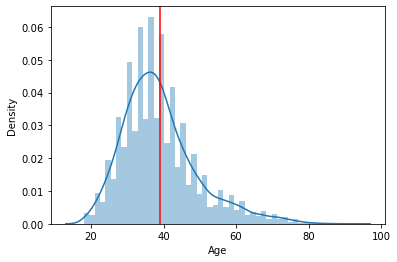

In [6]:
sns.distplot(data['Age'])
plt.axvline(mean_age,color='r')

In [7]:
data.shape

(10000, 14)


---

## `Samples as a whole`

## `500 samples of 20 each = 10000`

In [8]:
n=20
samples=[data.Age.sample(n) for i in range(500)]   # stratified sampling 20 * 500 = 10000

In [9]:
samples[:1]

[6739    55
 9740    29
 3043    38
 8501    29
 8447    33
 4155    41
 5139    47
 6354    42
 2562    58
 5729    43
 4804    34
 6630    36
 6971    44
 5541    51
 2204    31
 7924    47
 6169    29
 1342    71
 717     42
 1110    52
 Name: Age, dtype: int64]

### `mean of samples`

In [10]:
np.mean(samples)

38.9293

### `std of samples`

In [11]:
np.std(samples)

10.501357127057435

### `sample distribution`

Mean : 38.9293
Std : 10.501357127057435


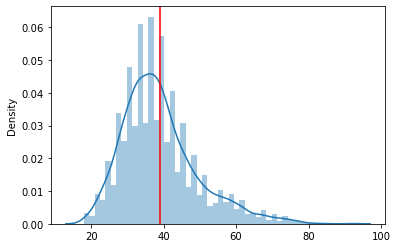

In [12]:
sns.distplot(samples)
plt.axvline(np.mean(samples),color='r')
print('Mean :',np.mean(samples))
print('Std :',np.std(samples))

# `---Proof of CLT---`

Size of each sample is : 500
For Sample Size: 2 
Confidence Interval is (48.15017986375325, 28.44182013624675) 
Mean=38.296 
Standard Error =5.027642787629208


Size of each sample is : 500
For Sample Size: 5 
Confidence Interval is (43.44433075623099, 35.054069243769014) 
Mean=39.2492 
Standard Error =2.1403728348117297


Size of each sample is : 500
For Sample Size: 10 
Confidence Interval is (41.07682376356462, 37.00877623643537) 
Mean=39.04279999999999 
Standard Error =1.0377672263084818


Size of each sample is : 500
For Sample Size: 30 
Confidence Interval is (39.52845162631011, 38.17208170702322) 
Mean=38.85026666666666 
Standard Error =0.34601273451196046


Size of each sample is : 500
For Sample Size: 100 
Confidence Interval is (39.10665119946748, 38.708108800532514) 
Mean=38.907379999999996 
Standard Error =0.10166897932014465


Size of each sample is : 500
For Sample Size: 300 
Confidence Interval is (38.994478973478024, 38.85790769318865) 
Mean=38.92619333333334 
Standard 

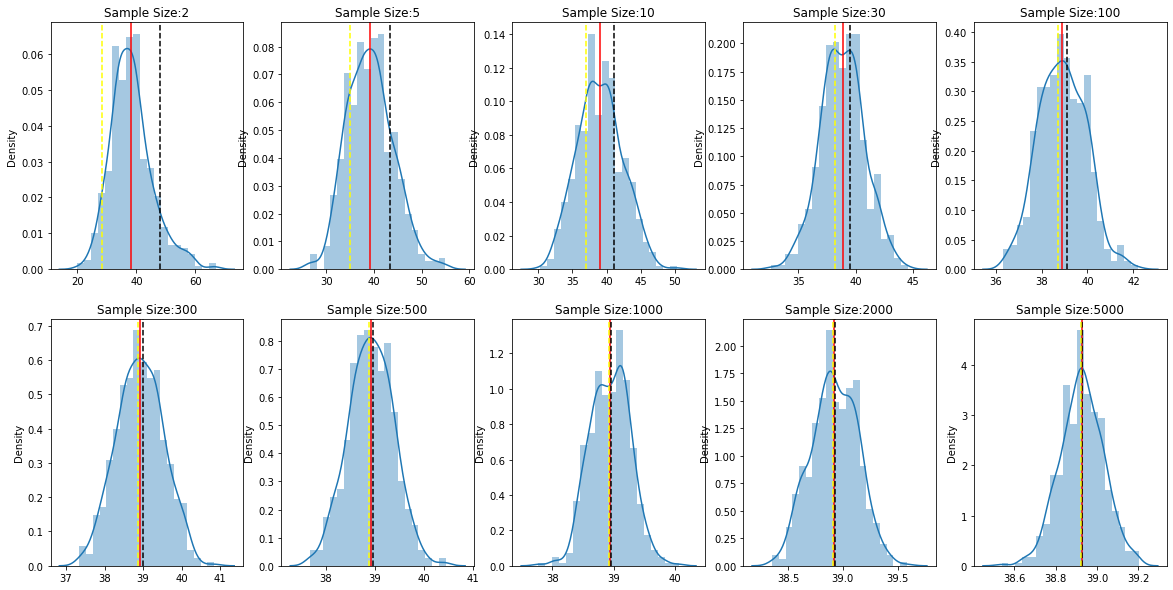

In [17]:
n=[2,5,10,30,100,300,500,1000,2000,5000]   # no of samples

cfi=[]
plt.figure(figsize=(20,10))
for index,sample_size in enumerate(n):
    sample_means=[data.Age.sample(sample_size).mean() for i in range(500)]# size of each sample is 500
    print('Size of each sample is : 500')
    plt.subplot(2,5,index+1)   # for subplots
    sns.distplot(sample_means,bins=20)
    plt.axvline(np.mean(sample_means),color='r') # mean
    plt.axvline((np.mean(sample_means)+(1.96*(np.std(sample_means)/np.sqrt(sample_size)))),color='black',linestyle='dashed') # upper bound
    plt.axvline((np.mean(sample_means)-(1.96*(np.std(sample_means)/np.sqrt(sample_size)))),color='yellow',linestyle='dashed') # lower bound
    cfi=((np.mean(sample_means)+(1.96*(np.std(sample_means)/np.sqrt(sample_size))),(np.mean(sample_means)-(1.96*(np.std(sample_means)/np.sqrt(sample_size))))))
    plt.title('Sample Size:'+str(sample_size))
    print(f'For Sample Size: {sample_size} \nConfidence Interval is {cfi} \nMean={np.mean(sample_means)} \nStandard Error ={np.std(sample_means)/np.sqrt(sample_size)}\n\n')

## `As number of sample increases the Standard error decreases`

## `NOTE: We take std of sample in standard error`

# ---Thank you---